In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

os.chdir('/content/drive/MyDrive/2025-2학기/text/new data')
os.listdir()

['가정폭력+발생현황_seoul(2023).xlsx',
 '경찰청 강원특별자치도경찰청_가정폭력 범죄 검거 현황_20241231.csv',
 '경찰청_시도청별 가정폭력검거및조치현황_20241231.csv',
 '빅카인즈_가정폭력_20210101-20250919.xlsx',
 'jtbc_news_with_year.csv',
 'jtbc_crawl_result.csv',
 'yna_crawl_result.csv']

In [59]:
bk = pd.read_excel("빅카인즈_가정폭력_20210101-20250919.xlsx")

bk['date'] = pd.to_datetime(bk['일자'], format='%Y%m%d')
bk['year'] = bk['date'].dt.year

bk_year = (
    bk.groupby('year')
      .size()
      .reset_index(name='빅카인즈')
)

print(bk_year)

   year  빅카인즈
0  2021    82
1  2022    75
2  2023    87
3  2024    52
4  2025    56


In [64]:
import pandas as pd
import re

yna = pd.read_csv("/content/drive/MyDrive/2025-2학기/text/yna_urls.csv")

def extract_year(url):
    match = re.search(r"20\d{2}", url)
    return int(match.group()) if match else None

yna['year'] = yna['url'].apply(extract_year)

print(yna.head())
print(yna['year'].value_counts())

                                                 url  year
0  https://www.yna.co.kr/view/AKR2025082507420000...  2025
1  https://www.yna.co.kr/view/AKR2025090812420005...  2025
2  https://www.yna.co.kr/view/AKR2025081409440006...  2025
3  https://www.yna.co.kr/view/AKR2025090917580005...  2025
4  https://www.yna.co.kr/view/AKR2025090911880000...  2025
year
2024    107
2025     92
2023     92
2021     42
2022     33
Name: count, dtype: int64


In [65]:
yna_year = (
    yna.groupby('year')
       .size()
       .reset_index(name='연합뉴스')
)

print(yna_year)

   year  연합뉴스
0  2021    42
1  2022    33
2  2023    92
3  2024   107
4  2025    92


In [66]:
pol = pd.read_csv(
    "/content/drive/MyDrive/2025-2학기/text/new data/경찰청_시도청별 가정폭력검거및조치현황_20241231.csv",
    encoding='cp949'
)

pol_year = pol.rename(columns={'연도': 'year', '검거건수': '실제범죄건수'})
pol_year = pol_year[['year', '실제범죄건수']]
pol_year = pol_year[pol_year['year'].between(2022, 2024)]

print(pol_year)

   year  실제범죄건수
5  2022   44816
6  2023   44524
7  2024   37905


In [67]:
merged = (
    bk_year
    .merge(yna_year, on='year', how='left')
    .merge(pol_year, on='year', how='left')
)

print(merged)

   year  빅카인즈  연합뉴스   실제범죄건수
0  2021    82    42      NaN
1  2022    75    33  44816.0
2  2023    87    92  44524.0
3  2024    52   107  37905.0
4  2025    56    92      NaN


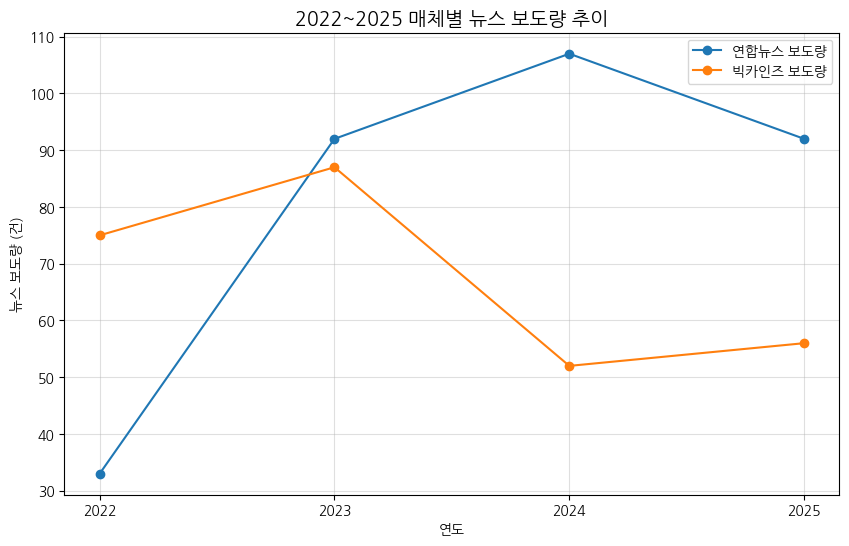

In [72]:
import matplotlib.pyplot as plt

years = [2022, 2023, 2024, 2025]

yna = [33, 92, 107, 92]       # 연합뉴스 보도량
bk = [75, 87, 52, 56]         # 빅카인즈 보도량

plt.figure(figsize=(10,6))
plt.plot(years, yna, marker='o', label='연합뉴스 보도량')
plt.plot(years, bk, marker='o', label='빅카인즈 보도량')

plt.title("2022~2025 매체별 뉴스 보도량 추이", fontsize=14)
plt.xlabel("연도")
plt.ylabel("뉴스 보도량 (건)")
plt.xticks(years)
plt.grid(True, alpha=0.4)

plt.legend(loc='upper right')
plt.show()

# JTBC는 연도별 데이터 누락 및 링크 오류로 인해 보도량 비교에서 제외하였으며, 텍스트 분석에만 활용하였습니다.

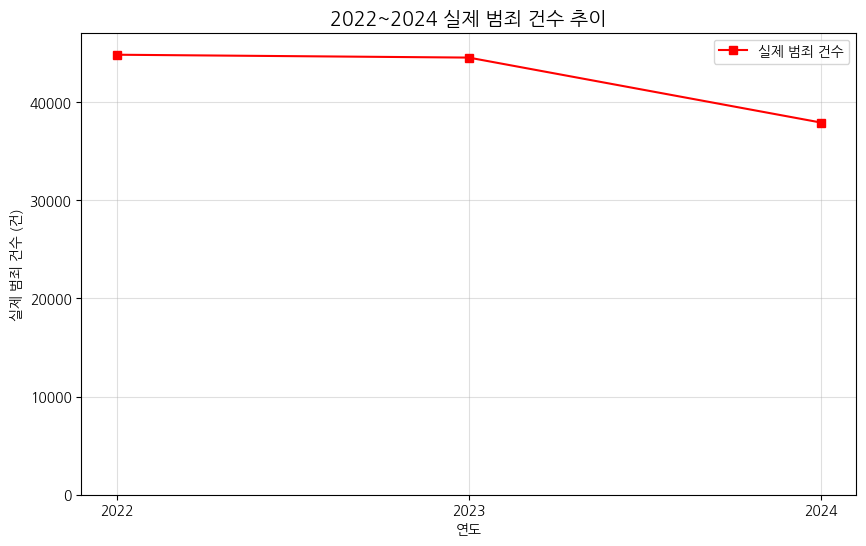

In [74]:
import matplotlib.pyplot as plt

crime_years = [2022, 2023, 2024]
crime_values = [44816, 44524, 37905]   # 실제 범죄 건수

plt.figure(figsize=(10,6))
plt.plot(crime_years, crime_values, marker='s', color='red', label='실제 범죄 건수')

plt.title("2022~2024 실제 범죄 건수 추이", fontsize=14)
plt.xlabel("연도")
plt.ylabel("실제 범죄 건수 (건)")
plt.xticks(crime_years)

plt.ylim(0, max(crime_values) * 1.05)

plt.grid(True, alpha=0.4)
plt.legend(loc='upper right')
plt.show()

# 2025년 실제 범죄 건수는 현재 진행 중인 연도이므로 경찰청에서 아직 전체 통계가 공개되지 않아 시각화에서 제외하였습니다.

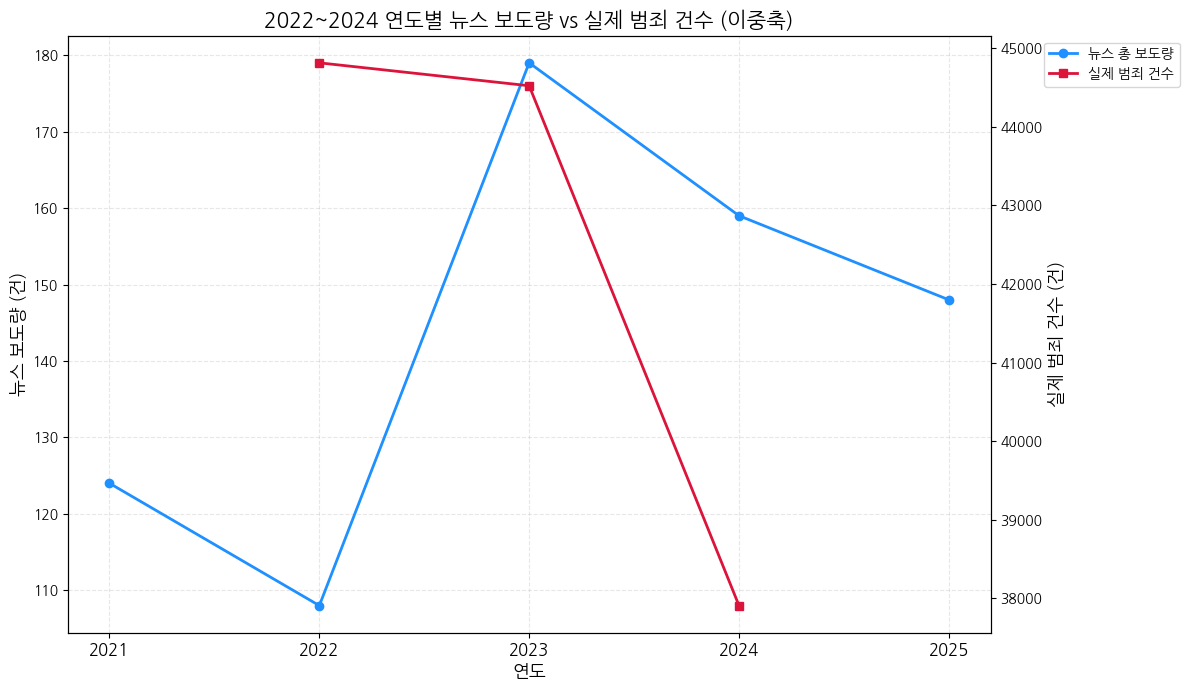

In [78]:
import matplotlib.pyplot as plt

years_plot = merged['year'].astype(int)
news_plot = merged['뉴스총보도량']
crime_plot = merged['실제범죄건수']

fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.plot(years_plot, news_plot,
         marker='o', color='dodgerblue', linewidth=2,
         label='뉴스 총 보도량')

ax1.set_xlabel("연도", fontsize=13, color='black')
ax1.set_ylabel("뉴스 보도량 (건)", fontsize=13, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelcolor='black')

ax1.set_xticks(years_plot)
ax1.set_xticklabels(years_plot, fontsize=12)

ax2 = ax1.twinx()
ax2.plot(years_plot, crime_plot,
         marker='s', color='crimson', linewidth=2,
         label='실제 범죄 건수')

ax2.set_ylabel("실제 범죄 건수 (건)", fontsize=13, color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title("2022~2024 연도별 뉴스 보도량 vs 실제 범죄 건수 (이중축)", fontsize=15, color='black')
ax1.grid(True, linestyle='--', alpha=0.3)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines1 + lines2, labels1 + labels2,
           loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()